# Lab SD204


## Antoine HABIS

## Question 1

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import math
import scipy
from numpy import rank, matrix
from sklearn.linear_model import LinearRegression



with open(r'D:\Antoine\Documents\SD\invest.txt', 'r') as in_file:
    
    stripped = (line.strip() for line in in_file)
    lines = (line.split(";") for line in stripped if line)
    with open('invest.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        writer.writerows(lines)


fixed_df = pd.read_csv(r'D:\Antoine\Documents\SD\invest.txt', sep=' ', encoding='latin1', engine='python')
pd.options.mode.chained_assignment = None
fixed_df

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50
5,1973,1326.4,229.8,105.75,6.44
6,1974,1434.2,228.7,115.08,7.83
7,1975,1549.2,206.1,125.79,6.25
8,1976,1718.0,257.9,132.34,5.50
9,1977,1918.3,324.1,140.05,5.46


# Question 2

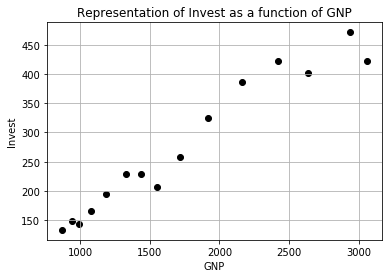

In [172]:
X = fixed_df["gnp"]
Y = fixed_df["invest"]
Z = fixed_df["interest"]
n = len(X)
plt.scatter(X,Y,color='k')
plt.xlabel("GNP")
plt.ylabel("Invest")
plt.title("Representation of Invest as a function of GNP")
plt.grid()
plt.show()

## Question 3

In [173]:
X, Y, Z = np.array(X), np.array(Y), np.array(Z)


In [174]:
X = np.log(X)
Z = np.log(Z)

In [99]:
X_cent = X - np.mean(X)
Y_cent = Y - np.mean(Y)
C1 = np.dot(X_cent.T, Y_cent)
C2 = np.linalg.norm(X_cent, 2)**2

beta1 = C1/C2 
beta0 = np.mean(Y)-beta1*np.mean(X)

Y_temp = beta0+beta1*X
num = np.linalg.norm(Y_temp-np.mean(Y),2)
denom = np.linalg.norm(Y_cent,2)
R = num/denom

print('the value of beta1 is: '+str(beta1)+'\n'+
      'the value of beta0 is: '+str(beta0)+'\n'+
      'the value of R is: '+str(R))
    


the value of beta1 is: 1.015281401598871
the value of beta0 is: -1.9635913352301833
the value of R is: 0.9812019647380378


## Question 4

In [100]:
C4 = np.linalg.norm((Y-Y_temp), 2)**2
sigma_squared = C4 / (n-2)
Var_beta1 = sigma_squared / C2
test1 = beta1 / np.sqrt(Var_beta1)
p_value=2*(1-scipy.stats.t.cdf(test1, n-2))
print('the test statistic value : '+str(test1)+'\n'+
      'and the p value : '+str(p_value)
     )

the test statistic value : 18.331984456866685
and the p value : 1.1363709973011282e-10


## Question 5

In [102]:
Interval = scipy.stats.t.interval(0.90, n-2, loc=0, scale=1)
x = Interval[1]
print(x)

1.7709333959867988


In [103]:
u = x * np.sqrt(sigma_squared)* np.sqrt(1/n+(np.log(1000)-np.mean(X))**(2)/(C2))

CI_1000_down = beta0 + beta1 * np.log(1000) - u
CI_1000_high = beta0 + beta1 * math.log(1000) + u 

v = x * np.sqrt(sigma_squared) * np.sqrt(1+1/n+(np.log(1000)-mean(X))**(2)/(C2))

PI_1000_down = beta0 + beta1 * np.log(1000) - v
PI_1000_high = beta0 + beta1 * np.log(1000) + v

print('the confidence interval is:['+str(CI_1000_down)+';'+str(CI_1000_high)+']'+
     '\n'+'the prediction interval is:['+str(PI_1000_high)+';'+str(PI_1000_high)+']')

the confidence interval is:[4.988222845971109;5.111225406662491]
the prediction interval is:[5.216628229194921;5.216628229194921]


## Question 6

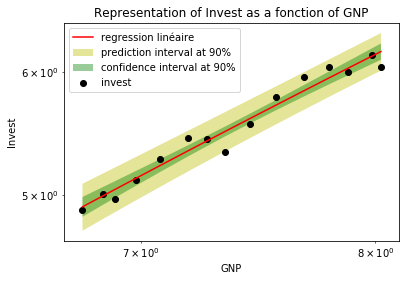

In [111]:
plt.plot(X,Y_temp,'r',label='regression linéaire')
CI_down = np.zeros((n))
CI_high = np.zeros((n))
PI_down = np.zeros((n))
PI_high = np.zeros((n))

u = x * np.sqrt(sigma_squared)* np.sqrt(1/n+(X-np.mean(X))**(2)/(C2))

CI_down = beta0 + beta1 * X - u
CI_high = beta0 + beta1 * X + u 

v = x * np.sqrt(sigma_squared) * np.sqrt(1+1/n+(X-mean(X))**(2)/(C2))

PI_down = beta0 + beta1 * X - v
PI_high = beta0 + beta1 * X + v  
    
plt.fill_between(X, PI_down, PI_high, facecolor = 'y', alpha = 0.4,label = 'prediction interval at 90%')
plt.fill_between(X, CI_down, CI_high, facecolor = 'g',alpha = 0.4,label = 'confidence interval at 90%')
plt.scatter(X,Y,color='k')
plt.xlabel("GNP")
plt.ylabel("Invest")
plt.yscale('log')
plt.xscale('log')
plt.title("Representation of Invest as a fonction of GNP")
plt.legend()
plt.show()

## Question 7

In [110]:
reg = LinearRegression().fit(X.values.reshape(n,1),Y.values.reshape(n,1))
print("the slope is: "+str(reg.coef_[0][0]))
print("the intercept is: "+str(reg.intercept_[0]))
print("the predicted value in log is : " + str(reg.predict(np.array([[np.log(1000)]]))[0][0]))


the slope is: 1.015281401598871
the intercept is: -1.9635913352301815
the predicted value in log is : 5.049724126316802


## Question 8

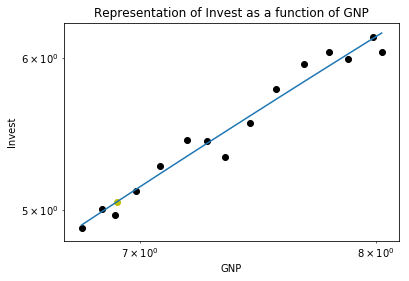

In [113]:
plt.scatter(X,Y,color='k')
plt.plot(X,X * reg.coef_[0][0] + reg.intercept_[0])
plt.yscale('log')
plt.xscale('log')
plt.xlabel('GNP')
plt.ylabel('Invest')
plt.title("Representation of Invest as a function of GNP")
plt.scatter(np.log(1000),np.log(1000) * reg.coef_[0][0] + reg.intercept_[0], color = 'y', alpha = 1)
plt.show()

## Question 9

In [141]:
X1 = np.array(fixed_df["gnp"])
X1 = np.expand_dims(X1,0)

Gram = np.dot(X1.T,X1) / n
print("the rank of the gram matric is equal to " + str(np.linalg.matrix_rank(Gram)))

the rank of the gram matric is equal to 1


## Question 10

In [175]:
Z = np.array(fixed_df["interest"])

X2, Y2, Z2 = X.reshape(n,1), Y.reshape(n,1), Z.reshape(n,1)
col1 = np.ones((n,1))
K = np.concatenate((col1,X2,Z2), axis = 1) 
m = np.linalg.inv(np.dot(K.T,K))
m = np.dot(m,K.T)
m = np.dot(m,Y2).reshape(1,3)[0]

sigma_squared_2 = (np.linalg.norm(Y - np.dot(K,m), 2)**2)/ (n-3)
K1 = np.linalg.inv(np.dot(K.T,K))
C = sigma_squared_2 * K1

print('the value of beta0 : '+str(m[0])+'\n'+
      'the value of beta1: '+str(m[1])+'\n'+
      'the value of beta2: '+str(m[2])+'\n\n'+
      'the variance of beta0 is: '+str(C[0][0])+'\n'+
      'the variance of beta1 is: '+str(C[1][1])+'\n'+
      'the variance of beta2 is: '+str(C[2][2])+'\n')



Y_temp = np.dot(K,m)
num = np.linalg.norm((Y_temp - np.mean(Y)),2)**2
denom = np.linalg.norm((Y - np.mean(Y)),2)**2 
R1 = np.sqrt(num/ denom)

print('the correlation coeficient is R : '+str(R1)+'\n')


testbeta0 = m[0] / np.sqrt(C[0][0])
testbeta1 = m[1] / np.sqrt(C[1][1])
testbeta2 = m[2] / np.sqrt(C[2][2])

p_value_b0 = 2 * (1-scipy.stats.t.cdf(abs(testbeta0), n-3))
p_value_b1 = 2 * (1-scipy.stats.t.cdf(abs(testbeta1), n-3))
p_value_b2 = 2 * (1-scipy.stats.t.cdf(abs(testbeta2), n-3))


print('the test statistic value for beta0 is : '+str(testbeta0)+'\n'+
      'and the p value : '+str(p_value_b0)+'\n\n'
      'the test statistic value for beta1 is: '+str(testbeta1)+'\n'+
      'and the p value : '+str(p_value_b1)+'\n\n'
      'the test statistic value for beta2 is: '+str(testbeta2)+'\n'+
      'and the p value : '+str(p_value_b2)+'\n\n'
     )
print("For beta0 and beta1 the pvalue is very small wa can reject the nul hypothesis but for beta2 the pvalue is very high so we can't reject this hypothesis")


the value of beta0 : -1516.4474304057705
the value of beta1: 236.49014682167774
the value of beta2: 6.215766345336668

the variance of beta0 is: 39224.87068144137
the variance of beta1 is: 931.2038884909725
the variance of beta2 is: 21.04799406838488

the correlation coeficient is R : 0.9770339068241222

the test statistic value for beta0 is : -7.656787589640305
and the p value : 5.873159705016562e-06

the test statistic value for beta1 is: 7.7498029574722205
and the p value : 5.197438312620761e-06

the test statistic value for beta2 is: 1.3548440997337017
and the p value : 0.20042506782958291


For beta0 and beta1 the pvalue is very small wa can reject the nul hypothesis but for beta2 the pvalue is very high so we can't reject this hypothesis


## Question 11

In [176]:
Interval = scipy.stats.t.interval(0.999, n-3, loc=0, scale=1)
x = Interval[1]
F = np.array([[1,np.log(1000),10]])
H = np.dot(np.dot(F,K1),np.transpose(F))

u = m[0]+m[1]*np.log(1000)+m[2]*10
v = x * math.sqrt(sigma_squared_2*H)
w = x * math.sqrt(sigma_squared_2*(1+H))
CI_1000_down = u - v
CI_1000_high = u + v

PI_1000_down = u - w
PI_1000_high = u + w


print('the value of the prediction of the log(investment for GNP = 1000 and Interest = 10 is '+str(u))
print('the confidence interval is:['+str(CI_1000_down)+';'+str(CI_1000_high)+']'+
     '\n'+'the prediction interval is:['+str(PI_1000_down)+';'+str(PI_1000_high)+']')

the value of the prediction of the log(investment for GNP = 1000 and Interest = 10 is 179.32629318230124
the confidence interval is:[66.96483043690833;291.6877559276942]
the prediction interval is:[17.218174566394453;341.43441179820803]


## Question 12

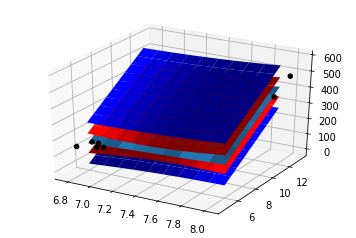

In [177]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Interval=scipy.stats.t.interval(0.999, n-3, loc=0, scale=1)

x=Interval[1]

V = np.linspace(6.8,8,10)
U = np.linspace(6,12,10)

CI_down = np.zeros((len(U),len(V)))
CI_high = np.zeros((len(U),len(V)))
PI_down = np.zeros((len(U),len(V)))
PI_high = np.zeros((len(U),len(V)))
regline = np.zeros((len(U),len(V)))

for i in range (len(U)):
    for j in range (len(V)):
        F = np.array([[1,V[i],U[i]]])
        H = np.dot(np.dot(F,K1),np.transpose(F))
        
        u = m[0]+m[1]*V[j]+m[2]*U[i]
        v = x * np.sqrt(sigma_squared_2*H)
        w = x * np.sqrt(sigma_squared_2*(1+H))
        
        CI_down[i][j] = u - v
        CI_high[i][j] = u + v
        PI_down[i][j] = u - w
        PI_high[i][j] = u + w
        regline[i][j] = u
        
U,V=np.meshgrid(U,V)
ax.plot_surface(V,U,regline,label='regression linéaire')
ax.plot_surface(V,U,CI_down,color='r')
ax.plot_surface(V,U,CI_high,color='r')
ax.plot_surface(V,U,PI_down,color='b')
ax.plot_surface(V,U,PI_high,color='b')
ax.scatter(X,Z,Y,color='k', alpha=1)
plt.show()

## Question 13

In [179]:
X_verif = np.concatenate((X.reshape(len(X),1),Z.reshape(len(Z),1)),axis=1)
reg = LinearRegression().fit(X_verif,Y.reshape(len(Y),1))
beta0= reg.intercept_[0]
beta1= reg.coef_[0][0]
beta2= reg.coef_[0][1]

print("the value of beta0 is:"+str(beta0))
print("the value of beta1 is:"+str(beta1))
print("the value of beta2 is:"+str(beta2))
prediction = reg.predict(np.array([[np.log(1000),10]]))[0][0]
print('the value of the prediction of the log(investment for GNP = 1000 and Interest = 10 is '+ str(prediction))



the value of beta0 is:-1516.4474304050148
the value of beta1 is:236.49014682156323
the value of beta2 is:6.215766345350786
the value of the prediction of the log(investment for GNP = 1000 and Interest = 10 is 179.3262931824072


**These values are the same we found at question 10**